# Sahibinden.com Automobile Data Analysis And Regression

## Introduction

In this project, we will examine the data collected from sahibinden.com using selenium before.
In the first step, we collected the data using selenium. Now, we will analyze the data using pandas and matplotlib.
Finally, we will try to make some predictions using sklearn.

## Data

The data is in the following format:

```csv
brand,series,model,ad_title,year,mileage,color,price,ad_date,city,district,url
Alfa Romeo,145,1.4 TS STD,Alfa Romeo 145 1.4 TEMİZ VE BAKIMLI,1998,260750,Bej,177500.0,20 Mayıs 2023,Bursa,Nilüfer,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-145-1.4-temiz-ve-bakimli-1100582023/detay
...
```



## Initializing Dataset and Data Exploration

In [1]:
from helpers import CarListing
import pandas as pd


# We are going to read car listings from file into a df.

df = pd.read_csv('data/v2.csv')

df.head()



,brand,series,model,ad_title,year,mileage,color,price,ad_date,city,district,url
0,Alfa Romeo,145,1.4 TS STD,Alfa Romeo 145 1.4 TEMİZ VE BAKIMLI,1998,260750,Bej,177500.0,20 Mayıs 2023,Bursa,Nilüfer,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-14...
1,Alfa Romeo,156,2.0 TS,SAHİBİNDEN UYGUN FİYATA 156,1998,295000,Gümüş Gri,195000.0,18 Mayıs 2023,İstanbul,Pendik,/ilan/vasita-otomobil-alfa-romeo-sahibinden-uy...
2,Alfa Romeo,156,2.0 TS,Hatasız tertemiz Alfa,1998,344000,Füme,220000.0,24 Mayıs 2023,Tekirdağ,Süleymanpaşa,/ilan/vasita-otomobil-alfa-romeo-hatasiz-terte...
3,Alfa Romeo,156,1.6 TS,"""Alfa"" Romeo, 2003 full paket sanruflu klimalı",2003,303000,Siyah,235000.0,19 Mayıs 2023,İzmir,Buca,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-20...
4,Alfa Romeo,156,2.0 TS,Alfa Romeo 156TS Manuel vites 2.0 benzin LPG'li,1998,285000,Kırmızı,245000.0,22 Mayıs 2023,Konya,Karatay,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-15...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11567 entries, 0 to 11566
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   brand     11567 non-null  object 
 1   series    11567 non-null  object 
 2   model     11567 non-null  object 
 3   ad_title  11567 non-null  object 
 4   year      11567 non-null  int64  
 5   mileage   11567 non-null  int64  
 6   color     11567 non-null  object 
 7   price     11567 non-null  float64
 8   ad_date   11567 non-null  object 
 9   city      11567 non-null  object 
 10  district  11567 non-null  object 
 11  url       11567 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB


## Data Preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Data Cleaning

# Checks for missing values and decides how to handle them. 

df.isnull().sum()

# Identifies and handle outliers. For instance, we can investigate if there are any unusually high or low prices for certain models and decide whether to remove or correct those values.

print(df.describe())

# Checks for duplicates and handle them.

print(df.duplicated().sum())



               year        mileage         price
count  11567.000000   11567.000000  1.156700e+04
mean    2011.983920  161842.326100  7.950024e+05
std        7.593267   98457.687561  8.263878e+05
min     1970.000000    1001.000000  1.595000e+03
25%     2009.000000   91000.000000  4.100000e+05
50%     2014.000000  158000.000000  6.100000e+05
75%     2017.000000  226075.000000  8.499990e+05
max     2023.000000  999999.000000  2.500000e+07
1498


### Date Problem

We got the dates in Turkish. We need to change them into an object of a date class in order to be able to use it properly. (i.e. sorting) 

In [5]:
# Changes ad_date column from string to real dates. However, they are in Turkish like "25 Mayıs 2019".
# Thats why we will make a function to get real dates.

def get_real_date(date):
    months = {
        'Ocak': 'January',
        'Şubat': 'February',
        'Mart': 'March',
        'Nisan': 'April',
        'Mayıs': 'May',
        'Haziran': 'June',
        'Temmuz': 'July',
        'Ağustos': 'August',
        'Eylül': 'September',
        'Ekim': 'October',
        'Kasım': 'November',
        'Aralık': 'December'
    }
    date = date.split()
    date[1] = months[date[1]]
    date = ' '.join(date)
    return date

df['ad_date'] = df['ad_date'].apply(get_real_date)

# Now we can convert it into date format.

df['ad_date'] = pd.to_datetime(df['ad_date'])

# Now, we have a fixed date and it is 26.05.2023. We are going to create a new column that shows how many days have passed since ad_date for each row.

df['days_passed'] = (pd.to_datetime('26.05.2023',dayfirst=True) - df['ad_date']).dt.days

# Now we can drop ad_date column.

df.drop('ad_date', axis=1, inplace=True)

df.head()


,brand,series,model,ad_title,year,mileage,color,price,city,district,url,days_passed
0,Alfa Romeo,145,1.4 TS STD,Alfa Romeo 145 1.4 TEMİZ VE BAKIMLI,1998,260750,Bej,177500.0,Bursa,Nilüfer,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-14...,6
1,Alfa Romeo,156,2.0 TS,SAHİBİNDEN UYGUN FİYATA 156,1998,295000,Gümüş Gri,195000.0,İstanbul,Pendik,/ilan/vasita-otomobil-alfa-romeo-sahibinden-uy...,8
2,Alfa Romeo,156,2.0 TS,Hatasız tertemiz Alfa,1998,344000,Füme,220000.0,Tekirdağ,Süleymanpaşa,/ilan/vasita-otomobil-alfa-romeo-hatasiz-terte...,2
3,Alfa Romeo,156,1.6 TS,"""Alfa"" Romeo, 2003 full paket sanruflu klimalı",2003,303000,Siyah,235000.0,İzmir,Buca,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-20...,7
4,Alfa Romeo,156,2.0 TS,Alfa Romeo 156TS Manuel vites 2.0 benzin LPG'li,1998,285000,Kırmızı,245000.0,Konya,Karatay,/ilan/vasita-otomobil-alfa-romeo-alfa-romeo-15...,4


## Data Exploration and Visualization

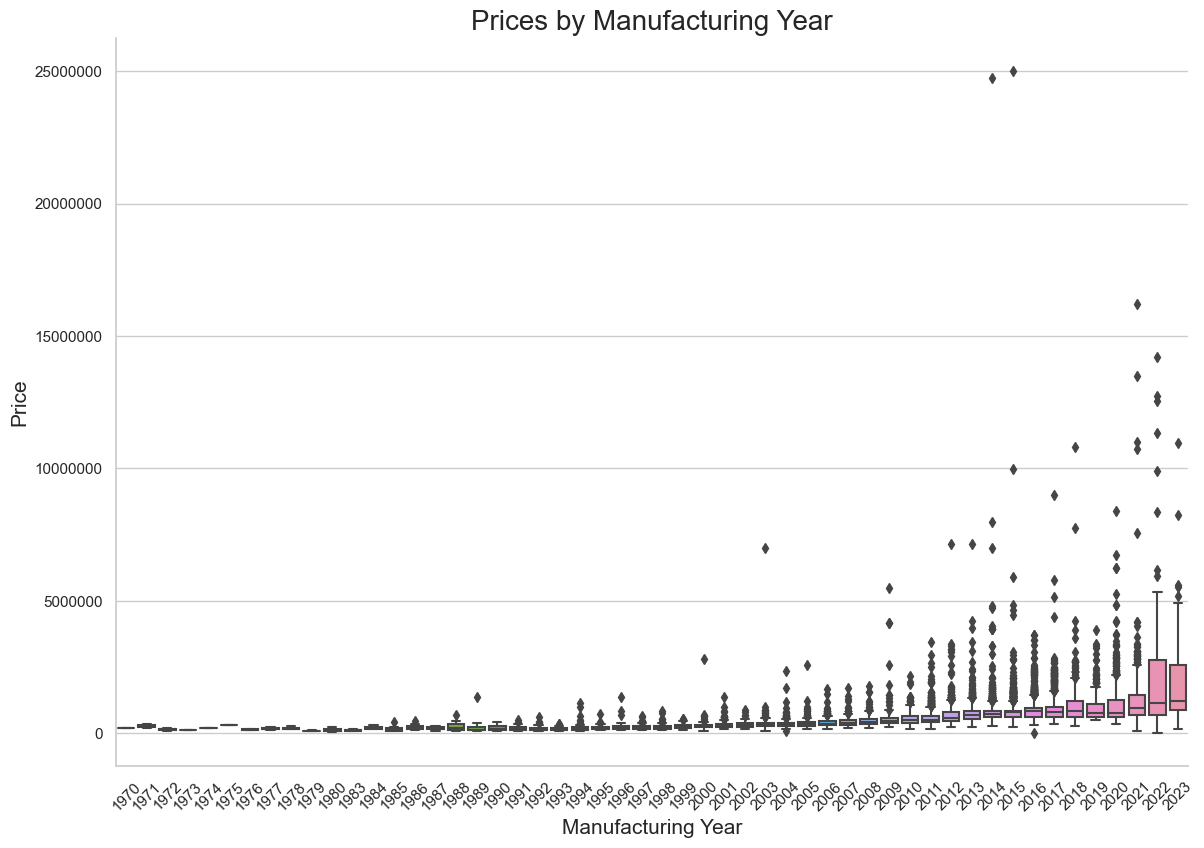

In [5]:
# Step 3: Data Exploration
# We will explore the data by looking at the distributions of various features. 

# Let's make a candle chart showing prices by manufacturing year. We need to show prices in scale.

# We will use the seaborn library to make the chart.


# Generates the plot.
sns.set_theme(style="whitegrid")
sns.catplot(x="year", y="price", kind="box", data=df, height=8.27, aspect=11.7/8.27)

# Adds title and fix labels, etc.
plt.title("Prices by Manufacturing Year", size=20)
plt.xlabel("Manufacturing Year", size=15)
plt.ylabel("Price", size=15)
plt.xticks(rotation=45)


# Changes y to decimal
plt.ticklabel_format(style='plain', axis='y')

# Shows the plot.
plt.show()


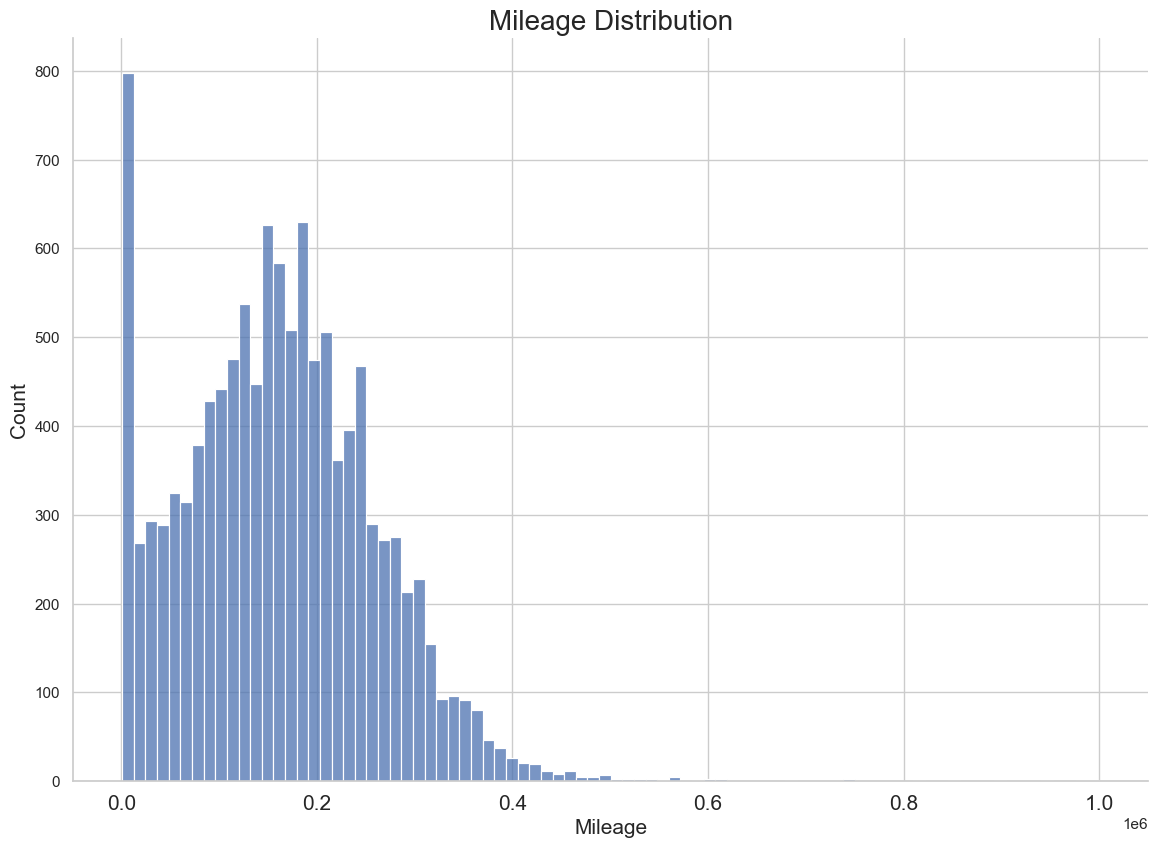

In [6]:
# Created a histogram of the "mileage" column to understand the distribution of car mileage. This can help us identify if there are any common mileage ranges.

# Generates the plot.

sns.set_theme(style="whitegrid")
sns.displot(df, x="mileage", height=8.27, aspect=11.7/8.27)

# Adds title and fix labels, etc.
plt.title("Mileage Distribution", size=20)
plt.xlabel("Mileage", size=15)
plt.ylabel("Count", size=15)
plt.xticks(size=15)


# Shows the plot.
plt.show()

Lets compare each medium prices for each brand. 

### Count Plot of Colors
Create a count plot to display the frequency of each car color in the dataset. This visualization will give you an overview of the popular colors among the listed cars.

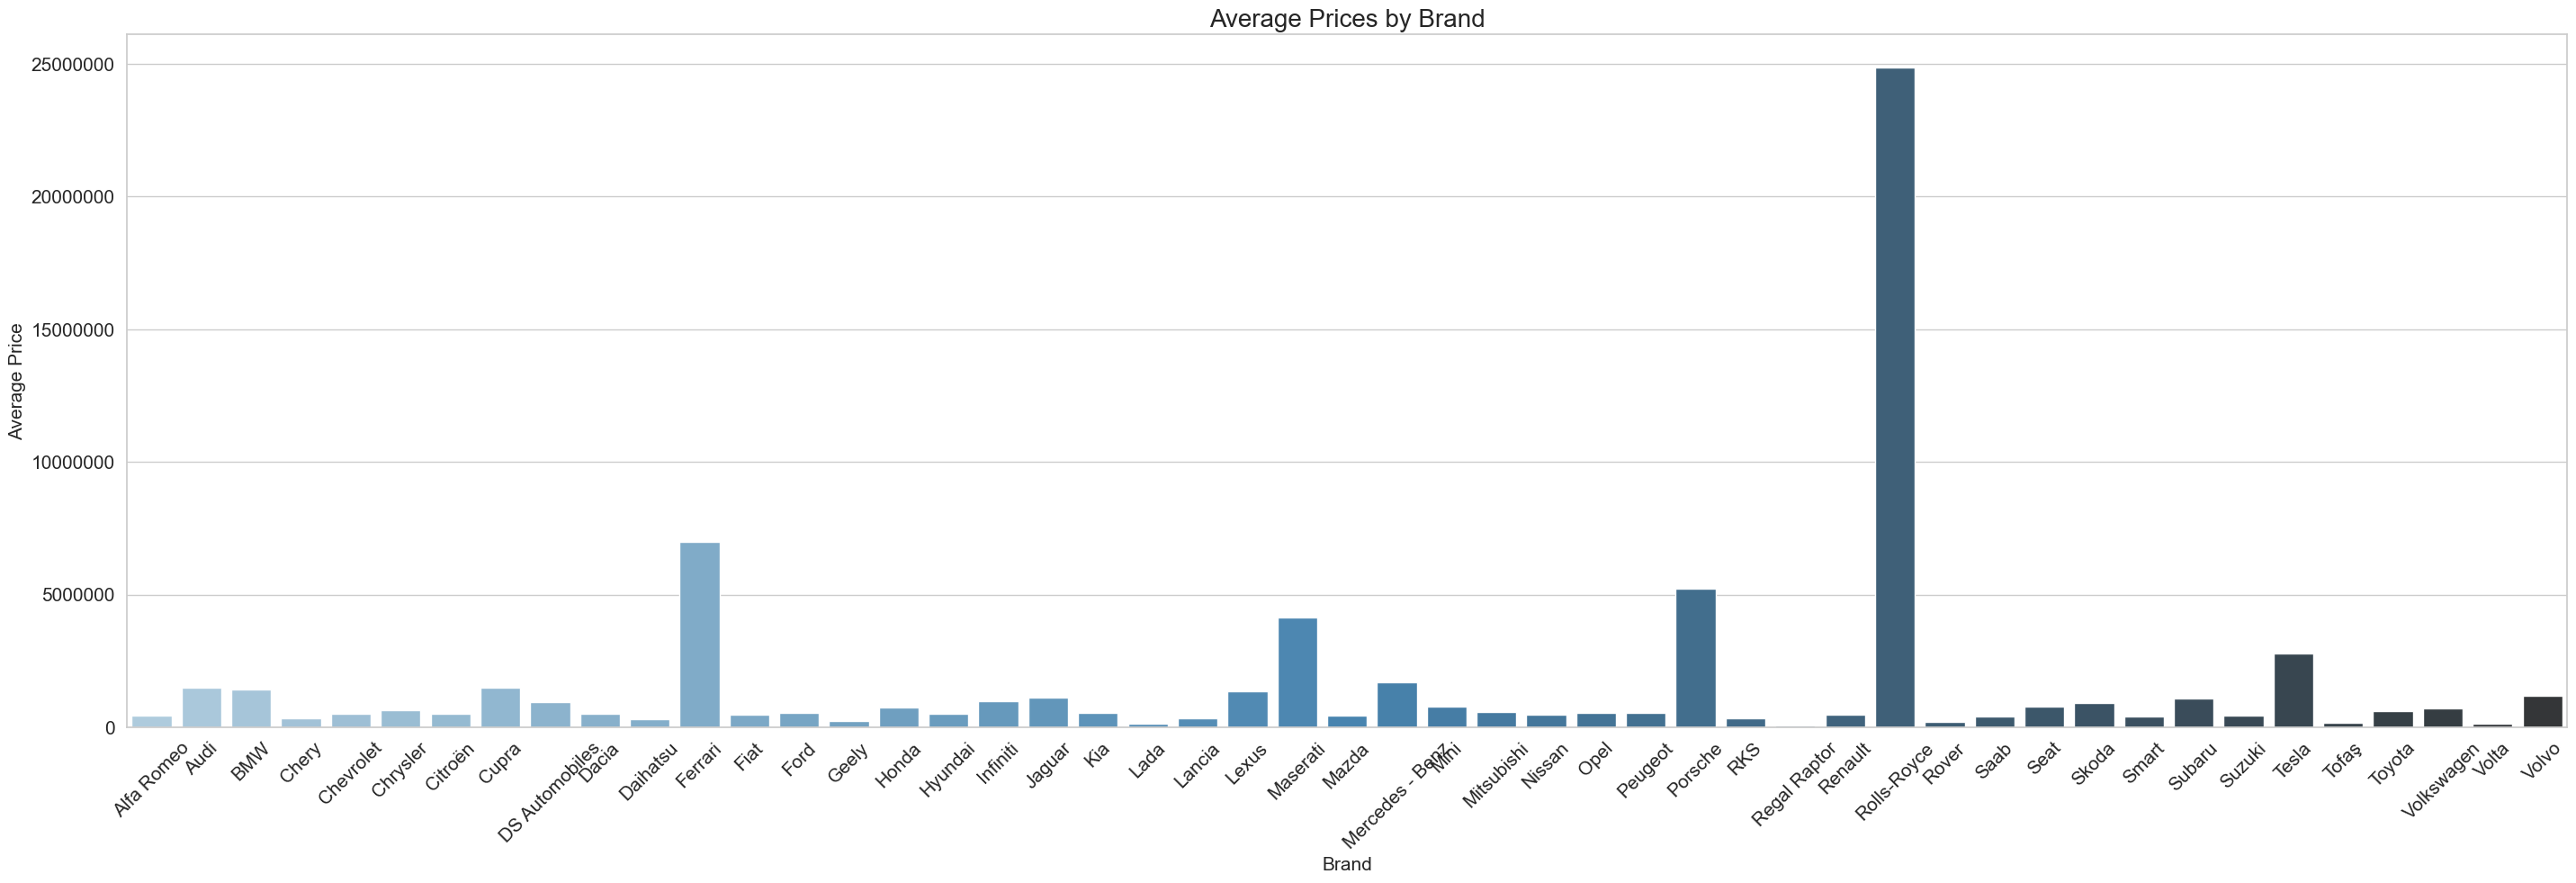

In [7]:
# Lets compare each medium prices for each brand. 

# Generates the new df for plotting.

df2 = df.groupby(['brand'])['price'].mean().reset_index()

# Generate the plot.

#  makes it monocolor
plt.figure(figsize=(35, 10))
sns.set_theme(style="whitegrid")
sns.barplot(x="brand", y="price", data=df2, palette='Blues_d')

# Add title and fix labels, etc.
plt.title("Average Prices by Brand", size=20)
plt.xlabel("Brand", size=15)
plt.ylabel("Average Price", size=15)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)

# Changes the way we show price from 1e+7 to normal decimals.
plt.ticklabel_format(style='plain', axis='y')


# Shows the plot.
plt.show()


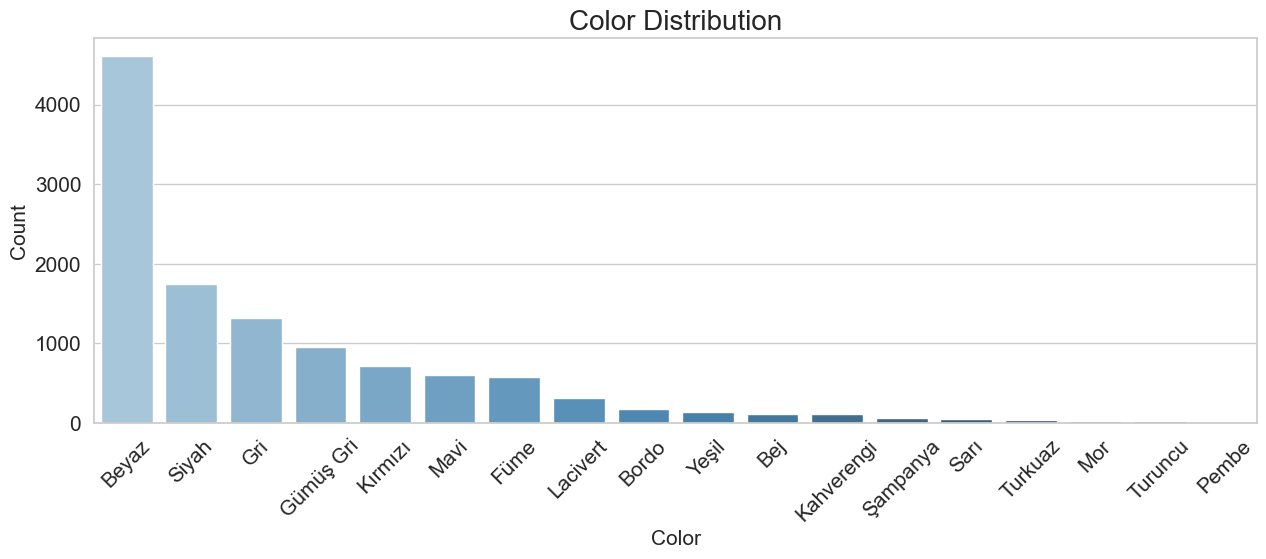

In [8]:
# Count Plot of Colors: Create a count plot to display the frequency of each car color in the dataset. This visualization will give you an overview of the popular colors among the listed cars.

# Generates the plot.

plt.figure(figsize=(15, 5))
sns.set_theme(style="whitegrid")
sns.countplot(x="color", data=df, order=df['color'].value_counts().index,palette='Blues_d')


# Adds title and fix labels, etc.
plt.title("Color Distribution", size=20)
plt.xlabel("Color", size=15)
plt.ylabel("Count", size=15)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.show()

Scatter Plot of Mileage vs. Price: Plot a scatter plot with mileage on the x-axis and price on the y-axis. This visualization can help you analyze the relationship between mileage and the price of the cars.

C:\Users\oyunc\AppData\Local\Temp\ipykernel_45276\3430358164.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df.groupby(['year'])['price', 'mileage']


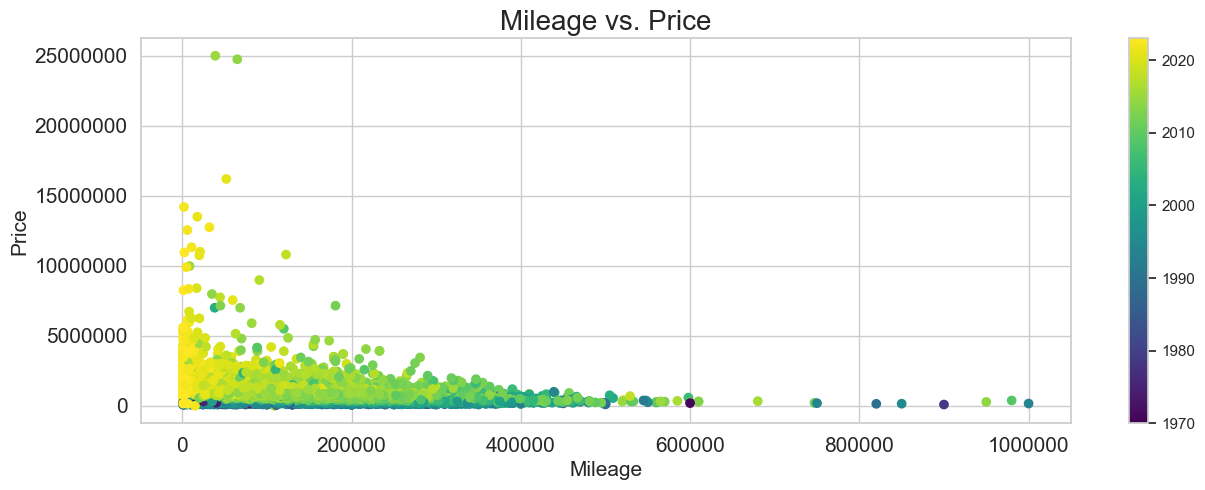

In [9]:
# Scatter Plot of Mileage vs. Price: Plots a scatter plot with mileage on the x-axis and price on the y-axis. This visualization can help you analyze the relationship between mileage and the price of the cars.

# Generates the data for the plot. Hue will be year.

df3 = df.groupby(['year'])['price', 'mileage']


# Generates the plot.

plt.figure(figsize=(15, 5))
# colorize the dots and plot
plt.scatter(df['mileage'], df['price'], c=df['year'], cmap='viridis')

# Adds title and fix labels, etc.
plt.title("Mileage vs. Price", size=20)
plt.xlabel("Mileage", size=15)
plt.ylabel("Price", size=15)
plt.xticks(size=15)
plt.yticks(size=15)

# adds legend.
plt.colorbar()


# Changing the way we show price from 1e+7 to normal decimals.

plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()




In [10]:
# Checking how many models there are in each brand.

df4 = df.groupby(['brand'])['model'].nunique().reset_index()

# Sorting descending.
df4 = df4.sort_values(by=['model'], ascending=False)

# Adding how many cars in there for each brand to the previous df.

df5 = df.groupby(['brand'])['model'].count().reset_index()

# Merging df4 and df5.
df6 = pd.merge(df4, df5, on='brand')

# Renaming columns.
df6.columns = ['brand', 'model_count', 'car_count']

# df6
df6.head()

,brand,model_count,car_count
0,BMW,210,1059
1,Mercedes - Benz,191,775
2,Opel,141,776
3,Fiat,134,890
4,Renault,126,1718


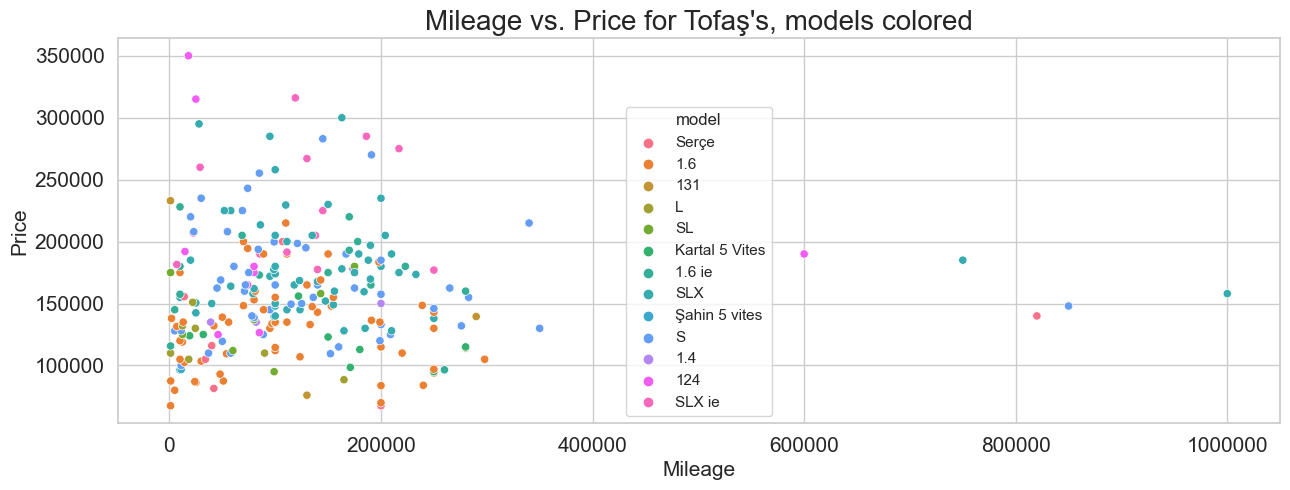

In [11]:
# Shows "Mileage vs. Price" for only Tofaş's.

# Generating the data for the plot.

df4 = df[df['brand'] == 'Tofaş'][['mileage', 'price', 'model']]
# Generate the plot.

plt.figure(figsize=(15, 5))
sns.set_theme(style="whitegrid")

# sets hue to model

sns.scatterplot(x="mileage", y="price", data=df4, hue='model')

# Adds title and fix labels, etc.

plt.title("Mileage vs. Price for Tofaş's, models colored", size=20)

plt.xlabel("Mileage", size=15)

plt.ylabel("Price", size=15)

plt.xticks(size=15)

plt.yticks(size=15)

# Changes the way we show price from 1e+7 to normal decimals.

plt.ticklabel_format(style='plain', axis='y')

# Changes the way we show mileage from 1e+7 to normal decimals.

plt.ticklabel_format(style='plain', axis='x')

plt.show()


Create a heatmap to present the relationships between different features.

C:\Users\oyunc\AppData\Local\Temp\ipykernel_45276\1244117428.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


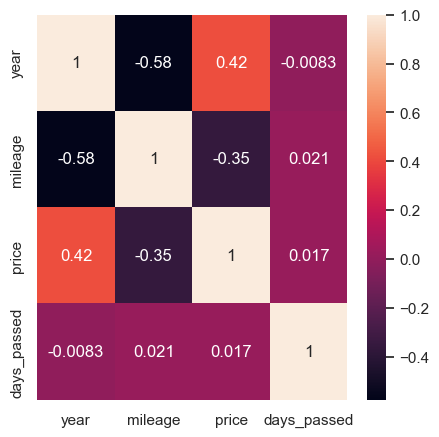

In [12]:
# Creates a heatmap to present the relationships between different features.

# Generates the data for the plot.

chart = plt.figure(
    figsize=(5,5)
)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11567 entries, 0 to 11566
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        11567 non-null  object 
 1   series       11567 non-null  object 
 2   model        11567 non-null  object 
 3   ad_title     11567 non-null  object 
 4   year         11567 non-null  int64  
 5   mileage      11567 non-null  int64  
 6   color        11567 non-null  object 
 7   price        11567 non-null  float64
 8   city         11567 non-null  object 
 9   district     11567 non-null  object 
 10  url          11567 non-null  object 
 11  days_passed  11567 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.1+ MB


## Pretiction

We will try to predict how many days passed for a given car.

### Linear Regression

We decided to use linear regression because we are predicting a continuous value.



In [15]:
# We will use sklearn.

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Linear Regression - Mean Squared Error: 6.095721280493587
Random Forest Regression - Mean Squared Error: 5.178289282627485
KNN Regression - Mean Squared Error: 6.060812445980986
XGBoost Regression - Mean Squared Error: 5.392234281799091


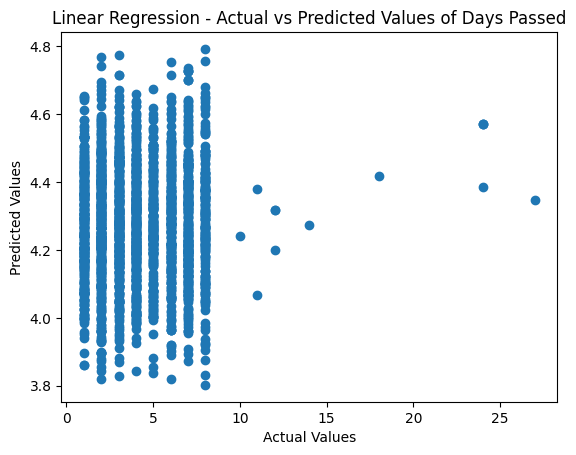

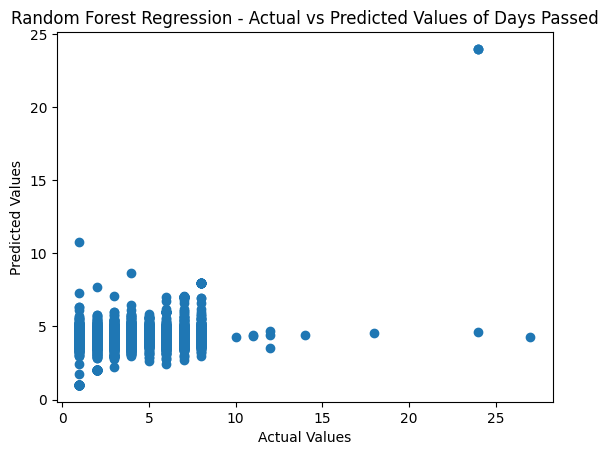

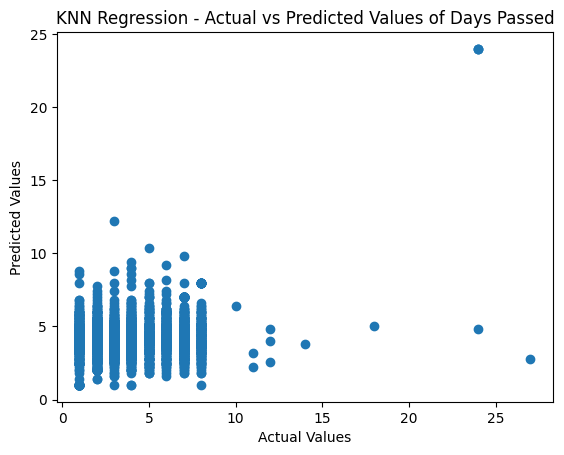

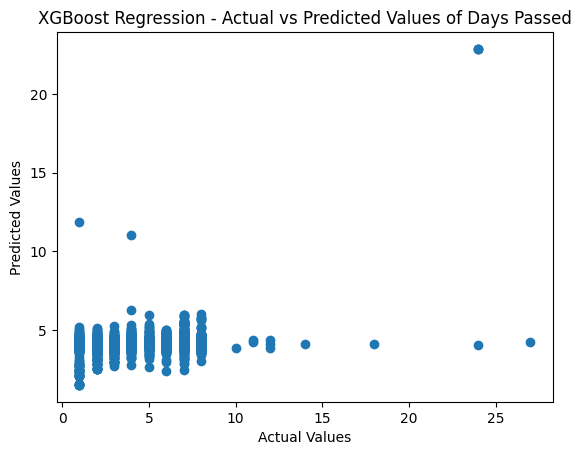

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X = df[['brand', 'series', 'model', 'ad_title', 'year', 'mileage', 'color', 'price', 'city', 'district', 'url']]
y = df['days_passed']

# Encode non-numerical features
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using linear regression
y_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression using mean squared error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression - Mean Squared Error:", mse_linear)

# Initialize and fit the random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions using random forest regression
y_pred_rf = rf_model.predict(X_test)

# Evaluate random forest regression using mean squared error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression - Mean Squared Error:", mse_rf)

# Initialize and fit the KNN regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions using KNN regression
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN regression using mean squared error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Regression - Mean Squared Error:", mse_knn)

# Initialize and fit the XGBoost regression model

import xgboost as xgb

# Convert the pandas DataFrame to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost regression
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

# Train the XGBoost regression model
xgb_model = xgb.train(params, dtrain)

# Make predictions using XGBoost regression
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate XGBoost regression using mean squared error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regression - Mean Squared Error:", mse_xgb)



import matplotlib.pyplot as plt

# Plot the actual vs predicted values for linear regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted Values of Days Passed")
plt.show()

# Plot the actual vs predicted values for random forest regression
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted Values of Days Passed")
plt.show()

# Plot the actual vs predicted values for KNN regression
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression - Actual vs Predicted Values of Days Passed")
plt.show()

# Plot the actual vs predicted values for XGBoost regression
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression - Actual vs Predicted Values of Days Passed")
plt.show()


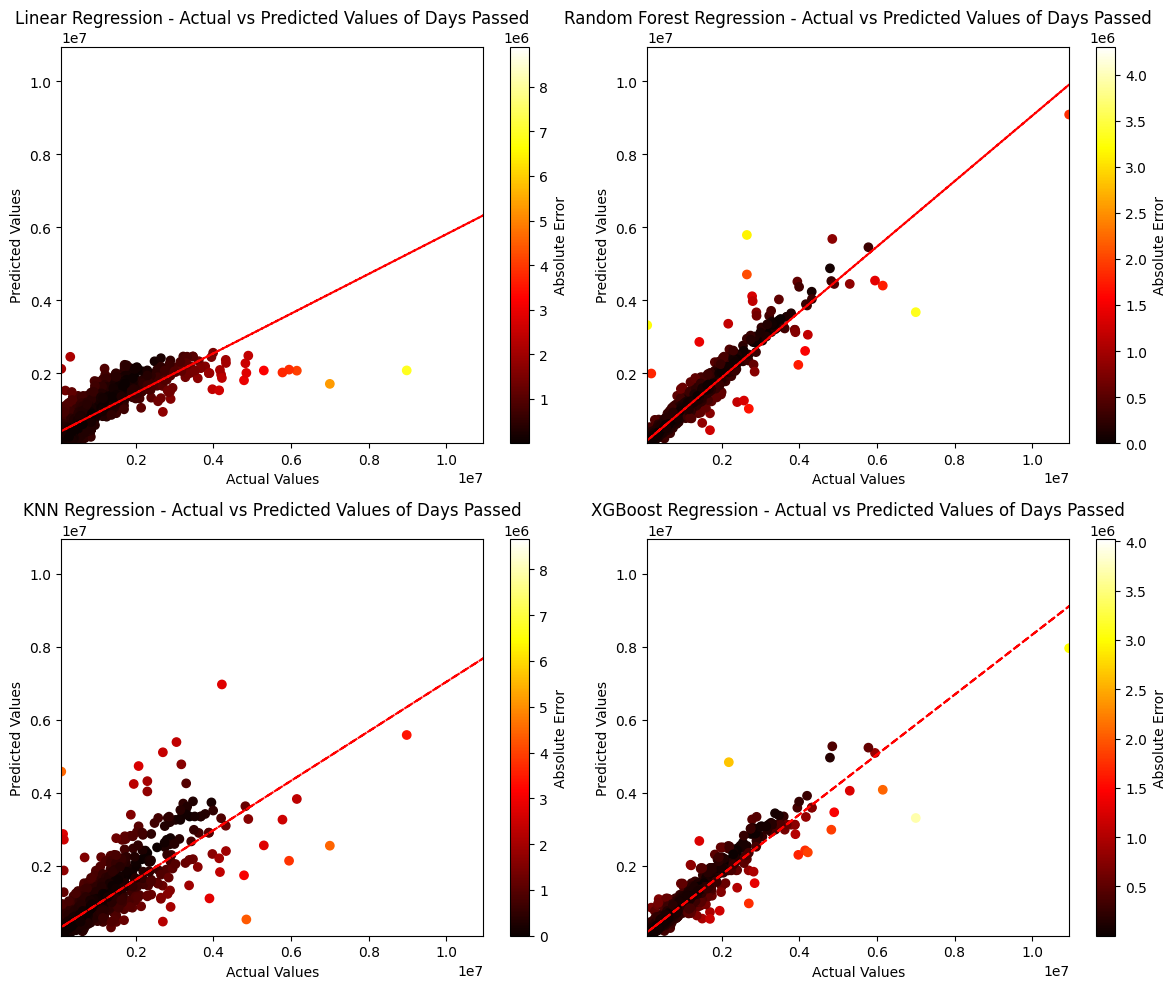

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the absolute errors for all regression models
abs_error_linear = np.abs(y_test - y_pred_linear)
abs_error_rf = np.abs(y_test - y_pred_rf)
abs_error_knn = np.abs(y_test - y_pred_knn)
abs_error_xgb = np.abs(y_test - y_pred_xgb)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Set the same limits for all subplots
xlim = (min(y_test), max(y_test))
ylim = (min(y_test), max(y_test))

# Plot the actual vs predicted values for linear regression
axs[0, 0].scatter(y_test, y_pred_linear, c=abs_error_linear, cmap='hot')
axs[0, 0].set_xlabel("Actual Values")
axs[0, 0].set_ylabel("Predicted Values")
axs[0, 0].set_title("Linear Regression - Actual vs Predicted Values of Days Passed")
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_linear, 1)
p = np.poly1d(z)
axs[0, 0].plot(y_test,p(y_test),"r--")

# Plot the actual vs predicted values for random forest regression
axs[0, 1].scatter(y_test, y_pred_rf, c=abs_error_rf, cmap='hot')
axs[0, 1].set_xlabel("Actual Values")
axs[0, 1].set_ylabel("Predicted Values")
axs[0, 1].set_title("Random Forest Regression - Actual vs Predicted Values of Days Passed")
axs[0, 1].set_xlim(xlim)
axs[0, 1].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_rf, 1)
p = np.poly1d(z)
axs[0, 1].plot(y_test,p(y_test),"r--")

# Plot the actual vs predicted values for KNN regression
axs[1, 0].scatter(y_test, y_pred_knn, c=abs_error_knn, cmap='hot')
axs[1, 0].set_xlabel("Actual Values")
axs[1, 0].set_ylabel("Predicted Values")
axs[1, 0].set_title("KNN Regression - Actual vs Predicted Values of Days Passed")
axs[1, 0].set_xlim(xlim)
axs[1, 0].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_knn, 1)
p = np.poly1d(z)
axs[1, 0].plot(y_test,p(y_test),"r--")

# Plot the actual vs predicted values for XGBoost regression
axs[1, 1].scatter(y_test, y_pred_xgb, c=abs_error_xgb, cmap='hot')
axs[1, 1].set_xlabel("Actual Values")
axs[1, 1].set_ylabel("Predicted Values")
axs[1, 1].set_title("XGBoost Regression - Actual vs Predicted Values of Days Passed")
axs[1, 1].set_xlim(xlim)
axs[1, 1].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_xgb, 1)
p = np.poly1d(z)
axs[1, 1].plot(y_test,p(y_test),"r--")

# Add a colorbar to each subplot
cbar_linear = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])
cbar_linear.set_label('Absolute Error')
cbar_rf = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])
cbar_rf.set_label('Absolute Error')
cbar_knn = fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])
cbar_knn.set_label('Absolute Error')
cbar_xgb = fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])
cbar_xgb.set_label('Absolute Error')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Linear Regression - Mean Squared Error: 247907006748.0254
Random Forest Regression - Mean Squared Error: 51630230355.31176
KNN Regression - Mean Squared Error: 200221089013.74493
XGBoost Regression - Mean Squared Error: 54462874605.79293


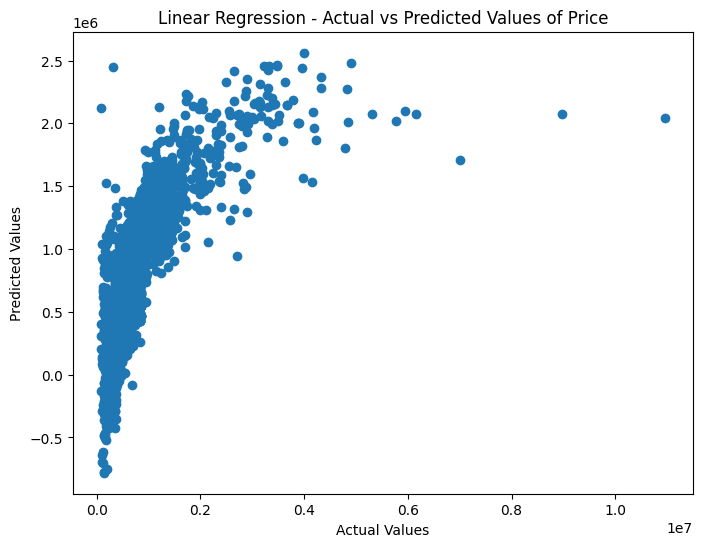

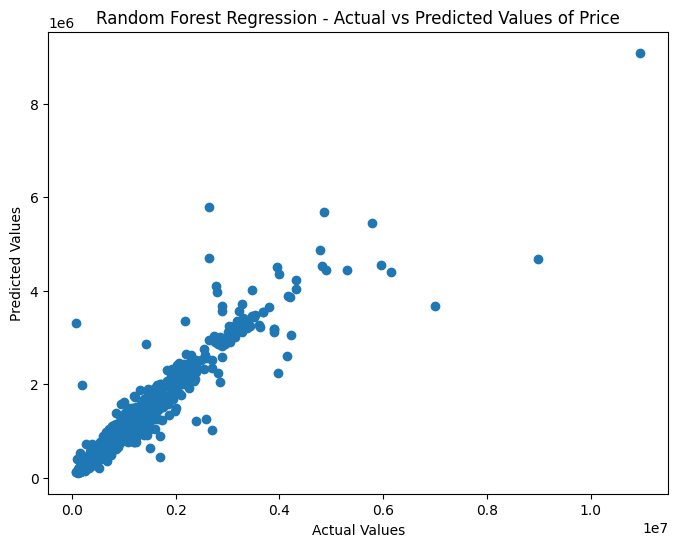

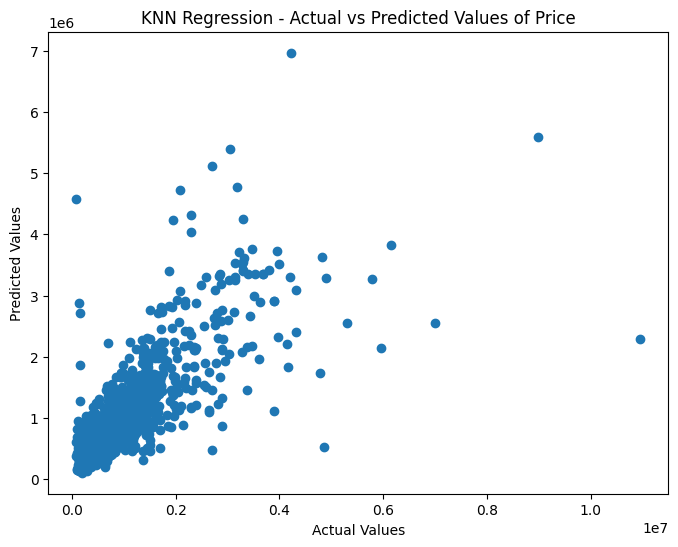

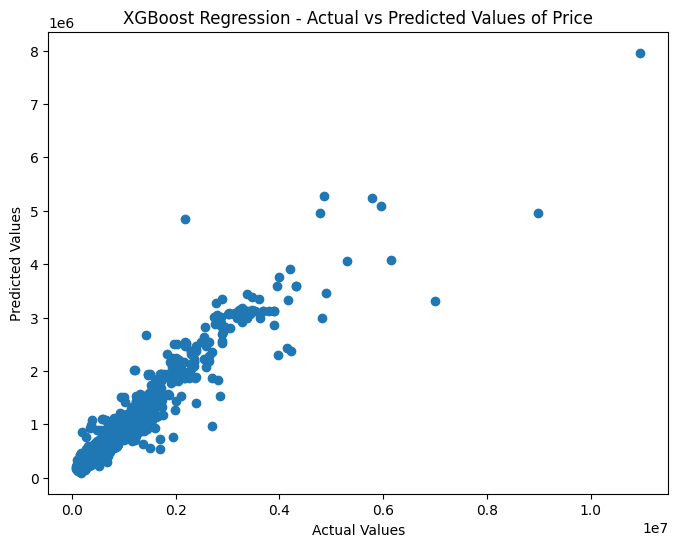

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X = df[['brand', 'series', 'model', 'ad_title', 'year', 'mileage', 'color', 'days_passed', 'city', 'district', 'url']]
y = df['price']

# Encode non-numerical features
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions using linear regression
y_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression using mean squared error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression - Mean Squared Error:", mse_linear)

# Initialize and fit the random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions using random forest regression
y_pred_rf = rf_model.predict(X_test)

# Evaluate random forest regression using mean squared error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression - Mean Squared Error:", mse_rf)

# Initialize and fit the KNN regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions using KNN regression
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN regression using mean squared error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN Regression - Mean Squared Error:", mse_knn)

# Initialize and fit the XGBoost regression model

import xgboost as xgb

# Convert the pandas DataFrame to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost regression
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

# Train the XGBoost regression model
xgb_model = xgb.train(params, dtrain)

# Make predictions using XGBoost regression
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate XGBoost regression using mean squared error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regression - Mean Squared Error:", mse_xgb)



import matplotlib.pyplot as plt

# Set the figure size to 8 inches by 6 inches
fig = plt.figure(figsize=(8, 6))

# Plot the actual vs predicted values for linear regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted Values of Price")
plt.show()

# Plot the actual vs predicted values for random forest regression
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted Values of Price")
plt.show()

# Plot the actual vs predicted values for KNN regression
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression - Actual vs Predicted Values of Price")
plt.show()

# Plot the actual vs predicted values for XGBoost regression
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression - Actual vs Predicted Values of Price")
plt.show()

## Test Results

In this section, we will compare the results of the models. We will plot the predicted values and the actual values in the test dataset and compare them.
The more closer the predicted values to the actual values, the better the model is. The closeness can be seen in the graph by looking at how close the points are to the line y=x.

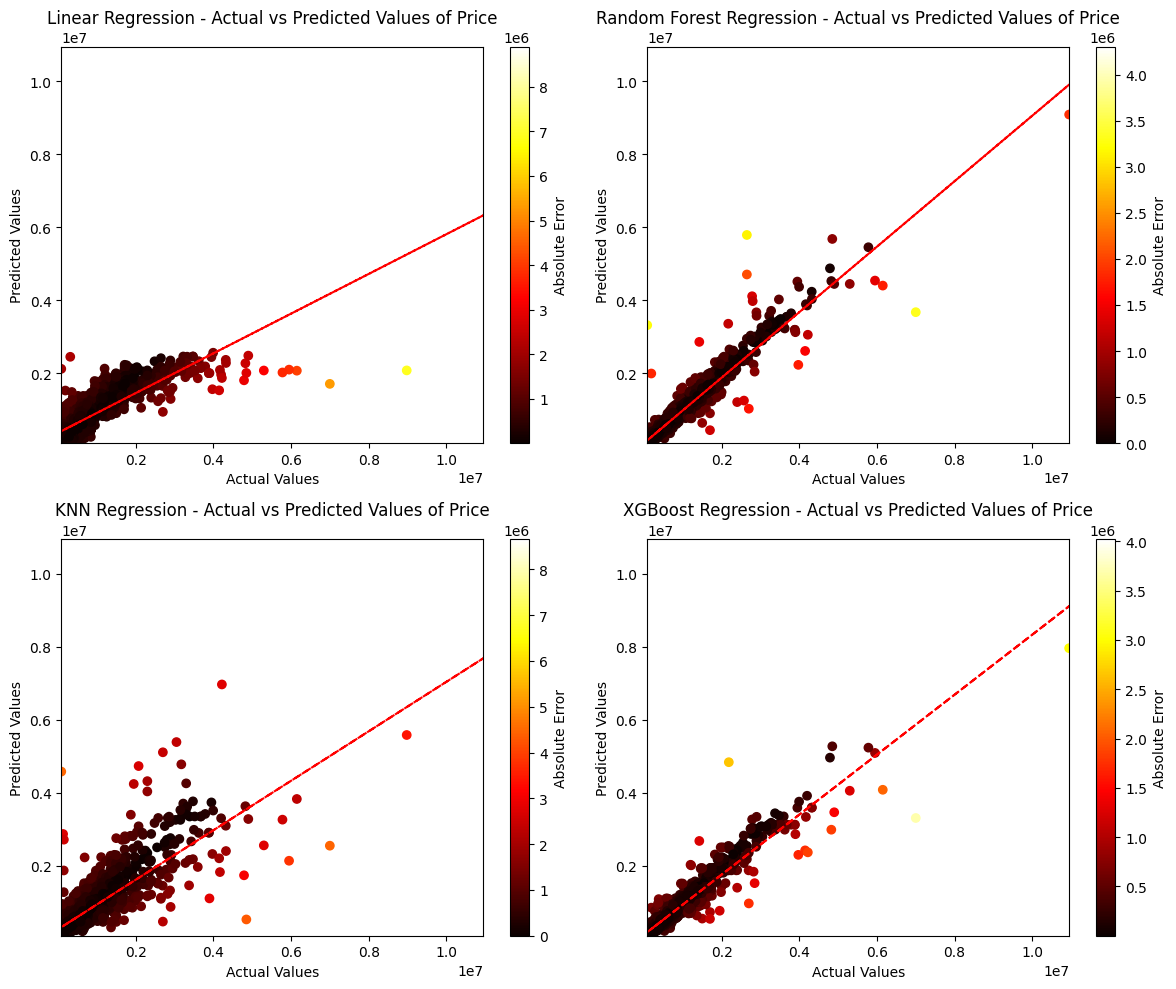

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the absolute errors for all regression models
abs_error_linear = np.abs(y_test - y_pred_linear)
abs_error_rf = np.abs(y_test - y_pred_rf)
abs_error_knn = np.abs(y_test - y_pred_knn)
abs_error_xgb = np.abs(y_test - y_pred_xgb)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Set the same limits for all subplots
xlim = (min(y_test), max(y_test))
ylim = (min(y_test), max(y_test))

# Plot the actual vs predicted values for linear regression
axs[0, 0].scatter(y_test, y_pred_linear, c=abs_error_linear, cmap='hot')
axs[0, 0].set_xlabel("Actual Values")
axs[0, 0].set_ylabel("Predicted Values")
axs[0, 0].set_title("Linear Regression - Actual vs Predicted Values of Price")
axs[0, 0].set_xlim(xlim)
axs[0, 0].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_linear, 1)
p = np.poly1d(z)
axs[0, 0].plot(y_test,p(y_test),"r--")

# Plot the actual vs predicted values for random forest regression
axs[0, 1].scatter(y_test, y_pred_rf, c=abs_error_rf, cmap='hot')
axs[0, 1].set_xlabel("Actual Values")
axs[0, 1].set_ylabel("Predicted Values")
axs[0, 1].set_title("Random Forest Regression - Actual vs Predicted Values of Price")
axs[0, 1].set_xlim(xlim)
axs[0, 1].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_rf, 1)
p = np.poly1d(z)
axs[0, 1].plot(y_test,p(y_test),"r--")

# Plot the actual vs predicted values for KNN regression
axs[1, 0].scatter(y_test, y_pred_knn, c=abs_error_knn, cmap='hot')
axs[1, 0].set_xlabel("Actual Values")
axs[1, 0].set_ylabel("Predicted Values")
axs[1, 0].set_title("KNN Regression - Actual vs Predicted Values of Price")
axs[1, 0].set_xlim(xlim)
axs[1, 0].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_knn, 1)
p = np.poly1d(z)
axs[1, 0].plot(y_test,p(y_test),"r--")

# Plot the actual vs predicted values for XGBoost regression
axs[1, 1].scatter(y_test, y_pred_xgb, c=abs_error_xgb, cmap='hot')
axs[1, 1].set_xlabel("Actual Values")
axs[1, 1].set_ylabel("Predicted Values")
axs[1, 1].set_title("XGBoost Regression - Actual vs Predicted Values of Price")
axs[1, 1].set_xlim(xlim)
axs[1, 1].set_ylim(ylim)
z = np.polyfit(y_test, y_pred_xgb, 1)
p = np.poly1d(z)
axs[1, 1].plot(y_test,p(y_test),"r--")

# Add a colorbar to each subplot
cbar_linear = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])
cbar_linear.set_label('Absolute Error')
cbar_rf = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])
cbar_rf.set_label('Absolute Error')
cbar_knn = fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])
cbar_knn.set_label('Absolute Error')
cbar_xgb = fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])
cbar_xgb.set_label('Absolute Error')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()